# Introduction
Phishing is a prevalent cybersecurity threat that exploits human trust to steal sensitive information such as login credentials, financial data, and personal details. These attacks often use deceptive URLs to lure victims into providing their information on fake websites. The Phishing URL Detection system seeks to mitigate this risk by developing a machine learning model that can distinguish between phishing and legitimate URLs. The system's Graphical user interface enables users to input URLs and receive immediate feedback on their legitimacy.

# Phishing Detection Dataset Overview
This dataset consists of 11,430 URLs, each with 87 extracted features, designed for benchmarking machine learning models in phishing detection.

The dataset is balanced, with an equal number of phishing and legitimate URLs.

The features are categorized into three types:

56 derived from the structure and syntax of URLs
24 from the content of the corresponding web pages
and 7 from external service queries.
The goal is to develop a model that can accurately distinguish between phishing and legitimate URLs.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Monica\\Desktop\\phishing datection\\dataset_phishing.csv')
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [3]:
df.shape

(11430, 89)

In [4]:
df.isna().sum().sum()

0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [6]:
# converting 'status' column into number
df['status']= df['status'].map({'phishing': 1, 'legitimate': 0})

In [7]:
df = df.dropna()

In [8]:
# checking duplicate value
df.duplicated().sum()

0

In [9]:
df_num = df.select_dtypes(include=['int64','float64'])

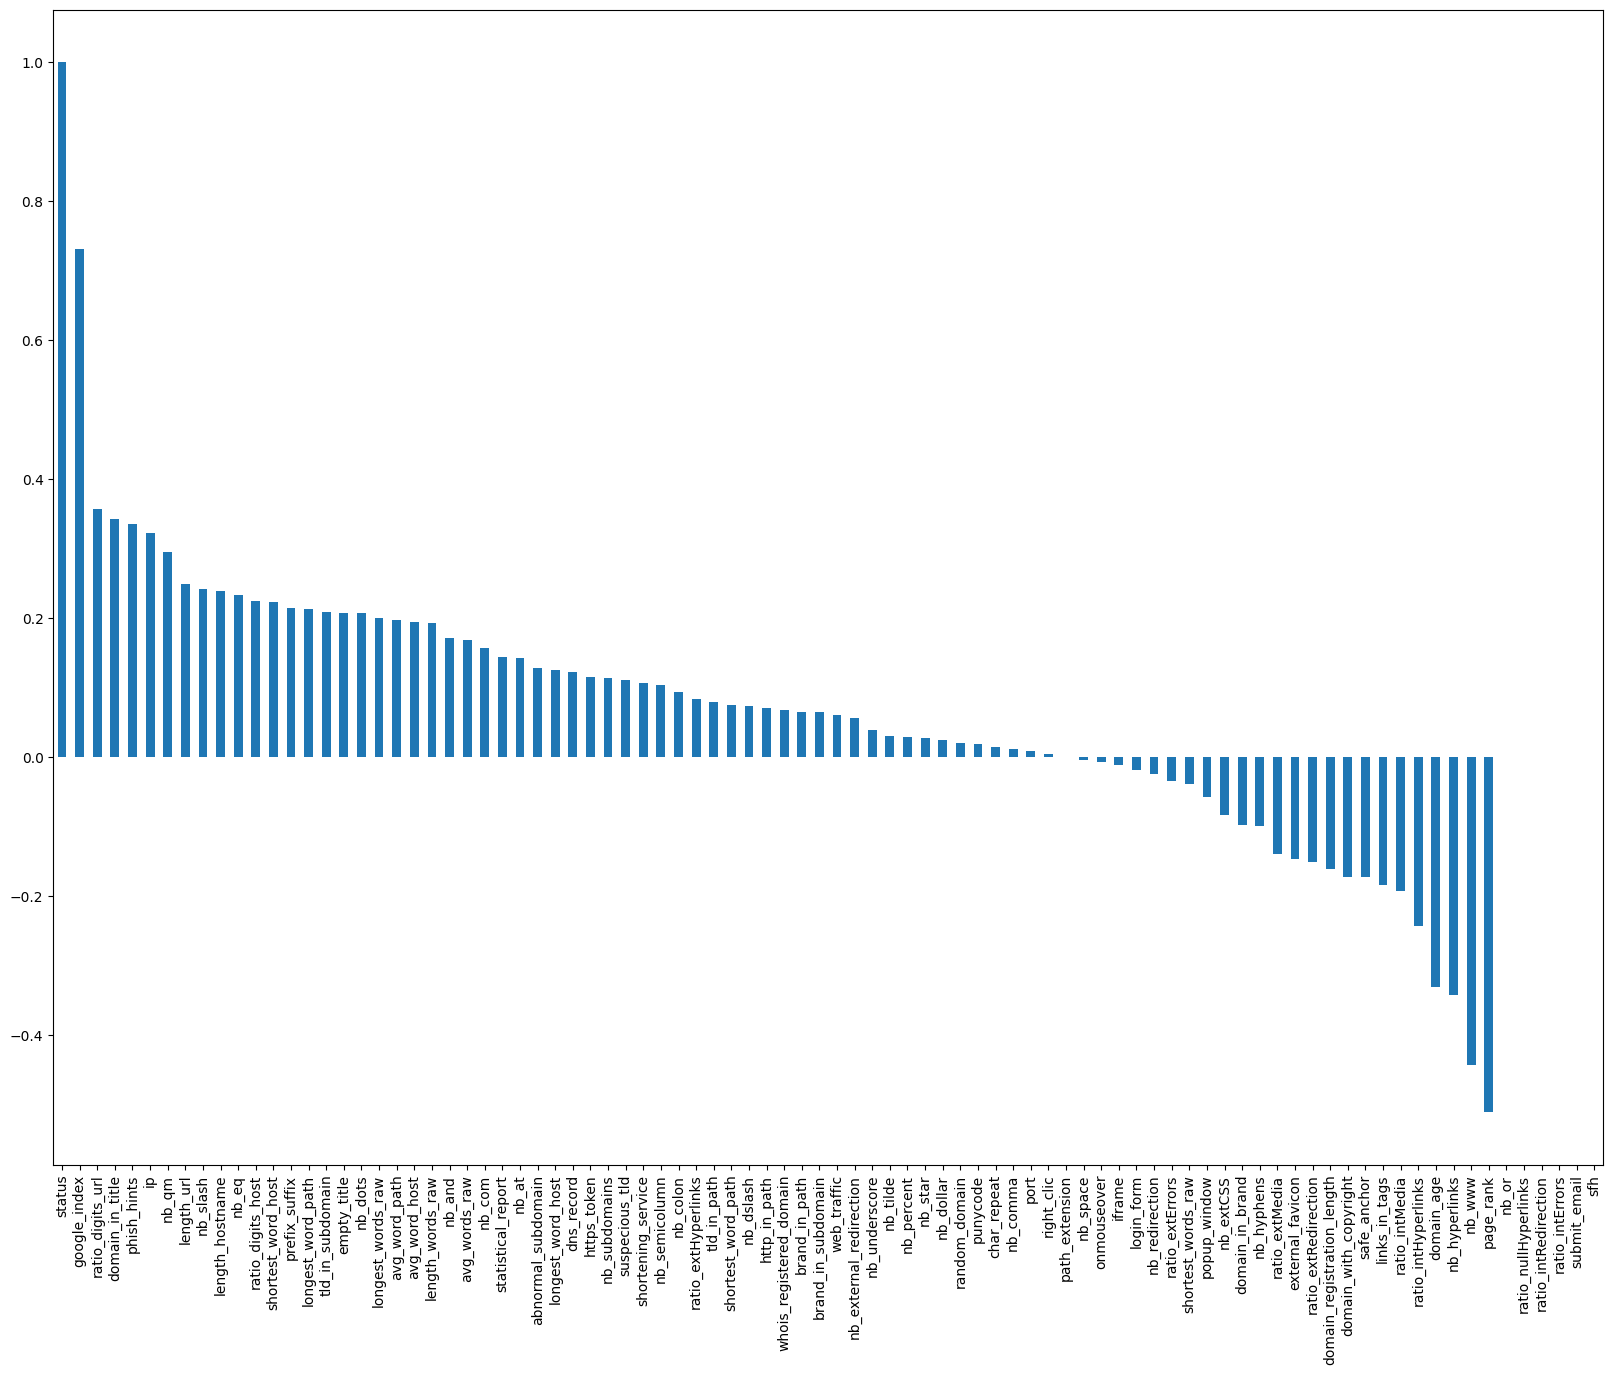

In [10]:
plt.figure(figsize=(20,15))
corr_num = df_num.corr()['status'].sort_values(ascending=False)
corr_num.plot(kind='bar')
plt.show()

# Feature Selection


In [11]:
# Definig Function for Features Selections
df_num = df.select_dtypes(include=['int64','float64'])
corr = df_num.corr()['status'].drop('status')

def feature_selector(corr_matrix , threshold):
    i=0
    feature_selected = []
    for score in corr_matrix:
        if abs(score)> threshold:
            feature_selected.append(corr_matrix.index[i])
            
        i=i+1
    return feature_selected    
                

In [12]:
feature_selected = feature_selector(corr,0.2)
feature_selected

['length_url',
 'length_hostname',
 'ip',
 'nb_dots',
 'nb_qm',
 'nb_eq',
 'nb_slash',
 'nb_www',
 'ratio_digits_url',
 'ratio_digits_host',
 'tld_in_subdomain',
 'prefix_suffix',
 'shortest_word_host',
 'longest_words_raw',
 'longest_word_path',
 'phish_hints',
 'nb_hyperlinks',
 'ratio_intHyperlinks',
 'empty_title',
 'domain_in_title',
 'domain_age',
 'google_index',
 'page_rank']

# Train Test Split

In [13]:
X = df[feature_selected]
y = df['status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scaling Data

In [14]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training

In [15]:
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier , AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score,precision_score, f1_score, recall_score, confusion_matrix,classification_report,ConfusionMatrixDisplay


In [16]:
lr = LogisticRegression(random_state=42)
svc = SVC(random_state=42)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
gb = GradientBoostingClassifier(random_state=42)
ab = AdaBoostClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
nb = GaussianNB()

In [17]:
models = { 'Logistic Regression':lr, 'KNeighborsClassifier':knn, 'DecisionTreeClassifier':tree, 'RandomForestClassifier':rf,
          'GradientBoostingClassifier':gb, 'AdaBoostClassifier':ab , 'XGBClassifier':xgb , 'SVM':svc, 'GaussianNB':nb}

In [18]:
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    print(f"Traing Result for {name}")
    print(f"Accuracy : {accuracy_score(y_train,y_train_pred):.4f}")
    print(f"Precision : {precision_score(y_train,y_train_pred):.4f}")
    print(f"Recall : {recall_score(y_train,y_train_pred):.4f}")
    print(f"F1 score : {f1_score(y_train,y_train_pred):.4f}")
    print('\n')
    print(f"Testing Results for {name}")
    print(f"Accuracy : {accuracy_score(y_test,y_test_pred):.4f}")
    print(f"Precision : {precision_score(y_test,y_test_pred):.4f}")
    print(f"Recall : {recall_score(y_test,y_test_pred):.4f}")
    print(f"F1 score : {f1_score(y_test,y_test_pred):.4f}")
    print('---------------------------------------')
    
    

Traing Result for Logistic Regression
Accuracy : 0.9341
Precision : 0.9357
Recall : 0.9326
F1 score : 0.9341


Testing Results for Logistic Regression
Accuracy : 0.9392
Precision : 0.9388
Recall : 0.9380
F1 score : 0.9384
---------------------------------------
Traing Result for KNeighborsClassifier
Accuracy : 0.9638
Precision : 0.9700
Recall : 0.9575
F1 score : 0.9637


Testing Results for KNeighborsClassifier
Accuracy : 0.9528
Precision : 0.9612
Recall : 0.9424
F1 score : 0.9517
---------------------------------------
Traing Result for DecisionTreeClassifier
Accuracy : 1.0000
Precision : 1.0000
Recall : 1.0000
F1 score : 1.0000


Testing Results for DecisionTreeClassifier
Accuracy : 0.9269
Precision : 0.9264
Recall : 0.9256
F1 score : 0.9260
---------------------------------------
Traing Result for RandomForestClassifier
Accuracy : 1.0000
Precision : 1.0000
Recall : 1.0000
F1 score : 1.0000


Testing Results for RandomForestClassifier
Accuracy : 0.9619
Precision : 0.9627
Recall : 0.9

In [19]:
# Gridsearch for GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

param_grid =  {
    'n_estimators': [50, 100, 200],      
    'learning_rate': [0.01, 0.1, 0.2],       
    'max_depth': [3, 4, 5],                  
    'subsample': [0.8, 0.9, 1.0],            
    'max_features': ['auto', 'sqrt', 'log2'] 
}

model = GradientBoostingClassifier()

grid_search = GridSearchCV(estimator = model , param_grid=param_grid , cv=5 , scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_scaled,y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters : ", best_params)
print("Best Model : ", best_model)



Best Parameters :  {'learning_rate': 0.2, 'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 200, 'subsample': 0.8}
Best Model :  GradientBoostingClassifier(learning_rate=0.2, max_depth=5, max_features='sqrt',
                           n_estimators=200, subsample=0.8)


In [20]:
y_pred_final = best_model.predict(X_test_scaled)

In [21]:
print(classification_report(y_test , y_pred_final))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1157
           1       0.96      0.97      0.96      1129

    accuracy                           0.97      2286
   macro avg       0.96      0.97      0.96      2286
weighted avg       0.97      0.97      0.97      2286



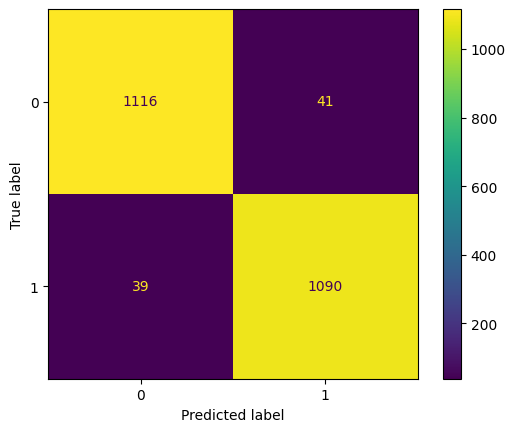

In [22]:
# confusion matrix

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_final)
plt.show()

# Roc Curve

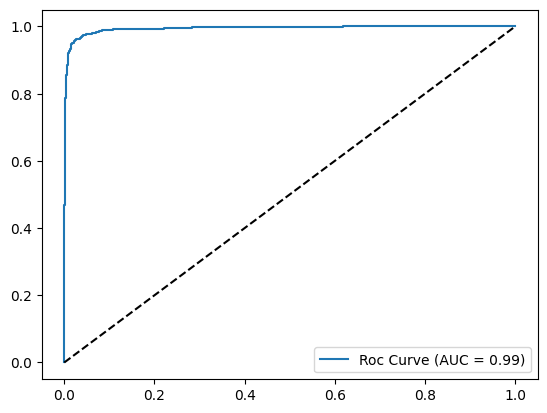

In [23]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

y_prob = best_model.predict_proba(X_test_scaled)[:,1]

fpr,tpr,threshold = roc_curve(y_test,y_prob)

auc_score = roc_auc_score(y_test,y_prob)

plt.plot(fpr,tpr, label=f"Roc Curve (AUC = {auc_score:.2f})")
plt.plot([0,1],[0,1],'k--')

plt.legend(loc='lower right')
plt.show()




# Model Deployment

In [24]:
import pickle

# save model
with open('Final_Model.pkl','wb') as file:
    pickle.dump(best_model , file)

In [25]:
# load model
with open('Final_Model.pkl','rb') as file:
    loaded_model = pickle.load(file)

In [26]:
loaded_model

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, max_features='sqrt',
                           n_estimators=200, subsample=0.8)